# Classify audio effects on guitar samples

## 1. Import and config

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as ms
ms.use('seaborn-muted')
import IPython.display as Ipd
import sklearn

## 2. Import and prepare data

In [5]:
#get audio files
fileswchorus = os.listdir('./DataSet/Samples/Chorus')
fileswdistortion = os.listdir('./DataSet/Samples/Distortion')
filesweq = os.listdir('./DataSet/Samples/EQ')
fileswdelay = os.listdir('./DataSet/Samples/FeedbackDelay')
fileswflanger = os.listdir('./DataSet/Samples/Flanger')
fileswnofx = os.listdir('./DataSet/Samples/NoFX')

#calc number of samples
n_data = len(fileswchorus)+len(fileswdistortion)+len(filesweq)+len(fileswdelay)+len(fileswflanger)+len(fileswnofx)
print(n_data)

#setup classes
labels = np.zeros(n_data)
features = np.zeros((n_data, 3460))
classes = ['Chorus','Distortion','EQ','FeedbackDelay','Flanger','NoFX']

9360


In [6]:
samplerate = 44100

def extract_features(filename):
    signal, dummy = librosa.load(filename, samplerate, mono=True)
    output = librosa.feature.mfcc(signal, samplerate).flatten()
    return output
    
idx = 0
    
for x in fileswchorus:
    output = extract_features('./DataSet/Samples/Chorus/' + x)
    features[idx,:] = output
    labels[idx] = 0
    idx = idx+1

print("Chorus done")
    
for x in fileswdistortion:
    output = extract_features('./DataSet/Samples/Distortion/' + x)
    features[idx,:] = output
    labels[idx] = 1
    idx = idx+1    
    
print("Distortion done")
    
for x in filesweq:
    output = extract_features('./DataSet/Samples/EQ/' + x)
    features[idx,:] = output
    labels[idx] = 2
    idx = idx+1    
    
print("EQ done")
    
for x in fileswdelay:
    output = extract_features('./DataSet/Samples/FeedbackDelay/' + x)
    features[idx,:] = output
    labels[idx] = 3
    idx = idx+1    
    
print("FeedbackDelay done")

for x in fileswflanger:
    output = extract_features('./DataSet/Samples/Flanger/' + x)
    features[idx,:] = output
    labels[idx] = 4
    idx = idx+1    
    
print("Flanger done")

for x in fileswnofx:
    output = extract_features('./DataSet/Samples/NoFX/' + x)
    features[idx,:] = output
    labels[idx] = 5
    idx = idx+1    
    
print("NoFX done")

Chorus done
Distortion done
EQ done
FeedbackDelay done
Flanger done
NoFX done


In [7]:
labels = pd.DataFrame(labels)
labels.columns = ['labels']
labels = labels['labels']

In [8]:
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.2, random_state=7)

In [9]:
#learning the scaling transformation from the train data and applying it to both train and test set.

#creating scaling object
scaler = sklearn.preprocessing.StandardScaler()

#learning scaling from train set
scaler.fit(feat_train)

#applying scaling to both train and test set
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

## SVM Classifier 

In [18]:
#Creating an instance of a SVM classifier
#model_SVM = sklearn.svm.SVC(kernel='rbf', C=2.0, verbose=True)

#training the model
#model_SVM.fit(feat_train, lab_train)

#applying the the model on the test data (features)
#lab_predict = model_SVM.predict(feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
#print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
#print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

[LibSVM]

KeyboardInterrupt: 

In [ ]:
#computing a comprehensive set of performance metrics
#print(sklearn.metrics.classification_report(lab_test, lab_predict))

#disp = sklearn.metrics.plot_confusion_matrix(model_, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

## ANN Classifier

In [10]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

##Creating an instance of a MLP classifier
#and setting it some option (max mum epoch, verbose on, activation of neurons)
mlp = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=10000, activation='relu', verbose=True)

#train the model
mlp.fit(feat_train, lab_train)

#applying the the model on the test data (features)
lab_predict = mlp.predict(feat_test)
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Iteration 1, loss = 1.59339466
Iteration 2, loss = 1.11618285
Iteration 3, loss = 0.90230576
Iteration 4, loss = 0.75348786
Iteration 5, loss = 0.62037031
Iteration 6, loss = 0.54509967
Iteration 7, loss = 0.48810654
Iteration 8, loss = 0.44791671
Iteration 9, loss = 0.41412032
Iteration 10, loss = 0.39092271
Iteration 11, loss = 0.35784506
Iteration 12, loss = 0.34075897
Iteration 13, loss = 0.30635092
Iteration 14, loss = 0.27746660
Iteration 15, loss = 0.25560149
Iteration 16, loss = 0.23245219
Iteration 17, loss = 0.20888878
Iteration 18, loss = 0.19034780
Iteration 19, loss = 0.18995286
Iteration 20, loss = 0.16861856
Iteration 21, loss = 0.15602382
Iteration 22, loss = 0.15087626
Iteration 23, loss = 0.14620562
Iteration 24, loss = 0.13330061
Iteration 25, loss = 0.12834850
Iteration 26, loss = 0.12098527
Iteration 27, loss = 0.11944731
Iteration 28, loss = 0.11338593
Iteration 29, loss = 0.10848551
Iteration 30, loss = 0.10466651
Iteration 31, loss = 0.09999741
Iteration 32, los

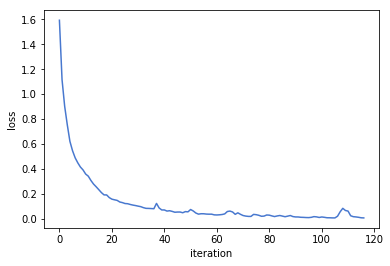

Number of mislabeled samples 122 out of 1872
Accuracy: 0.9348290598290598
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       377
         1.0       1.00      1.00      1.00       391
         2.0       0.90      0.93      0.91       242
         3.0       0.99      0.99      0.99       363
         4.0       0.88      0.89      0.89       378
         5.0       0.96      0.98      0.97       121

    accuracy                           0.93      1872
   macro avg       0.94      0.94      0.94      1872
weighted avg       0.93      0.93      0.93      1872



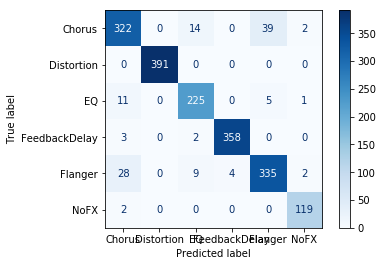

In [16]:
#plotting the loss curve over training iteration 
plt.plot(mlp.loss_curve_)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))
print(sklearn.metrics.classification_report(lab_test, lab_predict))
disp = sklearn.metrics.plot_confusion_matrix(mlp, feat_test, lab_test, display_labels=classes, cmap=plt.cm.Blues, normalize=None)

In [17]:
#displaying names of misclassified files
results = lab_test == lab_predict

for index, value in results.items():
    if value == False:
        print(classes[int(lab_test[index])])

Chorus
Chorus
Flanger
Chorus
FeedbackDelay
Chorus
Flanger
Chorus
Flanger
Chorus
Chorus
Chorus
EQ
Chorus
Flanger
Flanger
EQ
Flanger
EQ
Chorus
Chorus
Flanger
Flanger
Chorus
Chorus
Flanger
Flanger
NoFX
Flanger
Chorus
Chorus
Flanger
Flanger
Flanger
EQ
Flanger
Flanger
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Chorus
Flanger
Chorus
EQ
NoFX
Chorus
Flanger
Flanger
Chorus
Flanger
Chorus
Chorus
Chorus
Flanger
Flanger
Chorus
Chorus
EQ
EQ
EQ
FeedbackDelay
EQ
Flanger
EQ
Chorus
EQ
EQ
Flanger
Flanger
Chorus
Flanger
Chorus
Flanger
Chorus
Flanger
Chorus
Flanger
EQ
Flanger
Flanger
Chorus
FeedbackDelay
Flanger
Chorus
Flanger
EQ
Flanger
Chorus
Flanger
Chorus
EQ
Flanger
Chorus
Chorus
Chorus
EQ
Chorus
Chorus
Chorus
FeedbackDelay
Flanger
Chorus
Chorus
Chorus
EQ
Flanger
Flanger
Flanger
Flanger
Chorus
Chorus
FeedbackDelay
Chorus
Chorus
Chorus
Flanger
Flanger
